## Heart Attack predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Data Content¶
Age: Age of the patient
Sex: Sex of the patient(0 =male, 1 =female)
exng: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp: Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
trtbps: resting blood pressure (in mm Hg)
chol: cholestoral in mg/dl fetched via BMI sensor
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
output: 0= less chance of heart attack 1= more chance of heart attack
slp=slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
0: downsloping; 1: flat; 2: upsloping

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().value_counts

<bound method DataFrame.value_counts of        age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  output  
0  

## Test and train of data

In [6]:
from sklearn.model_selection import train_test_split;
#getting data ready for train test split with X and Y axis
X=df['output']
Y=df.drop('output',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(Y,X,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [7]:
#check if the data is split evenly or not
from collections import Counter
print(Y_test.unique())
Counter(Y_train)

[0 1]


Counter({1: 133, 0: 109})

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Looking For Co-relations

In [9]:
corr_matrix=df.corr()

In [10]:
corr_matrix['cp'].sort_values(ascending=False)

cp          1.000000
output      0.433798
thalachh    0.295762
slp         0.119717
fbs         0.094444
trtbps      0.047608
restecg     0.044421
sex        -0.049353
age        -0.068653
chol       -0.076904
oldpeak    -0.149230
thall      -0.161736
caa        -0.181053
exng       -0.394280
Name: cp, dtype: float64

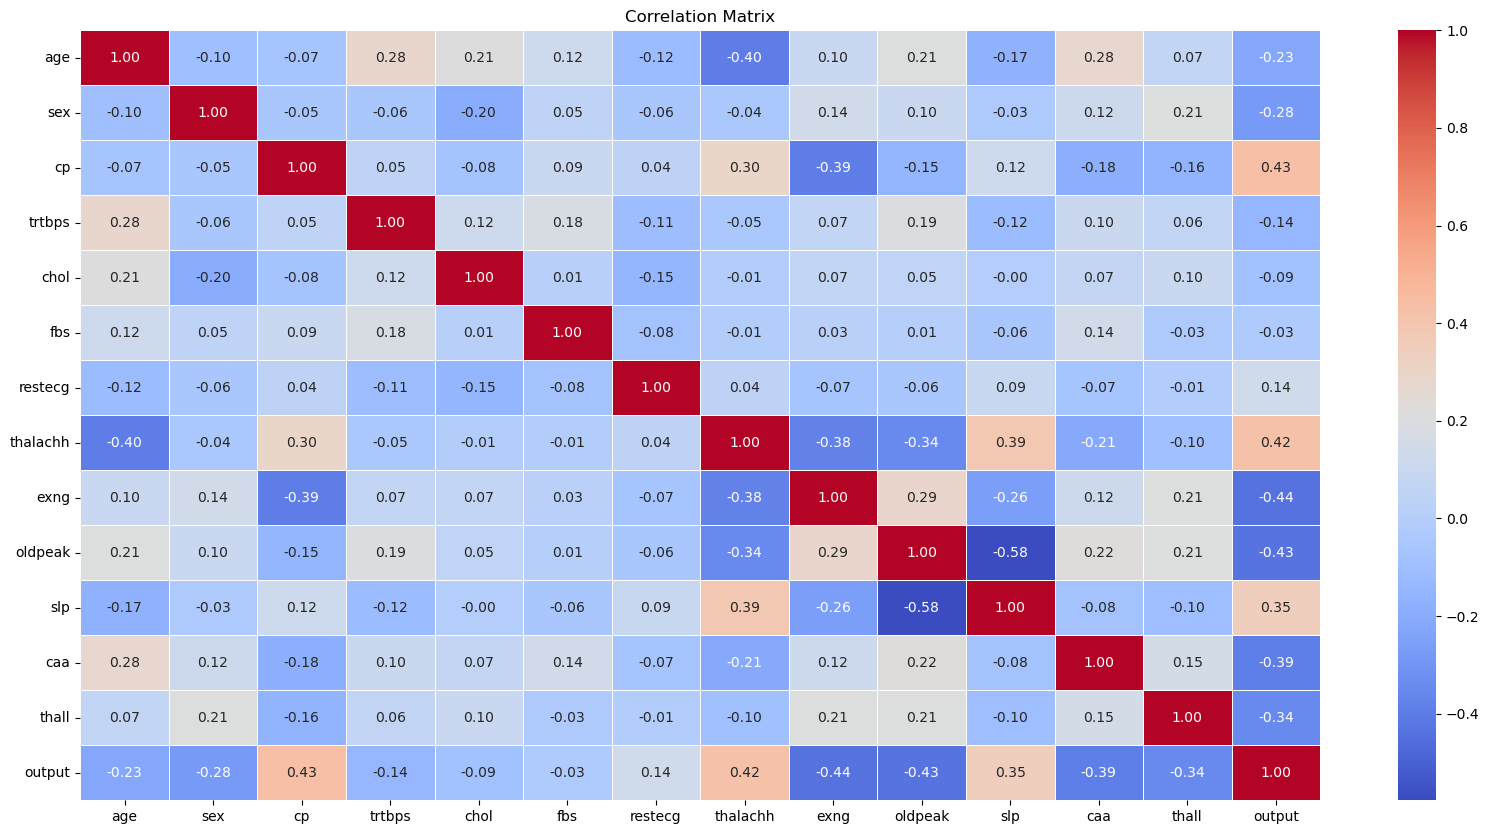

In [11]:
plt.figure(figsize=(20, 10))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


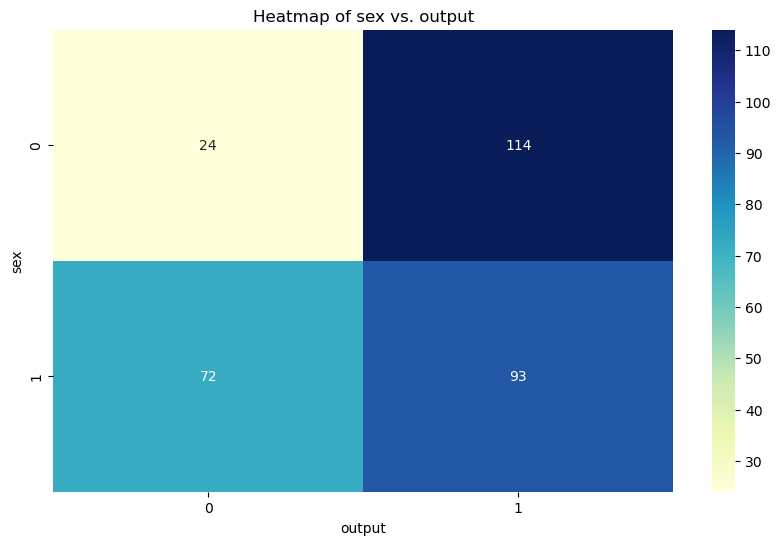

In [12]:

crosstab = pd.crosstab(df['output'], df['sex'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('output')
plt.ylabel('sex')
plt.title('Heatmap of sex vs. output')
plt.show()




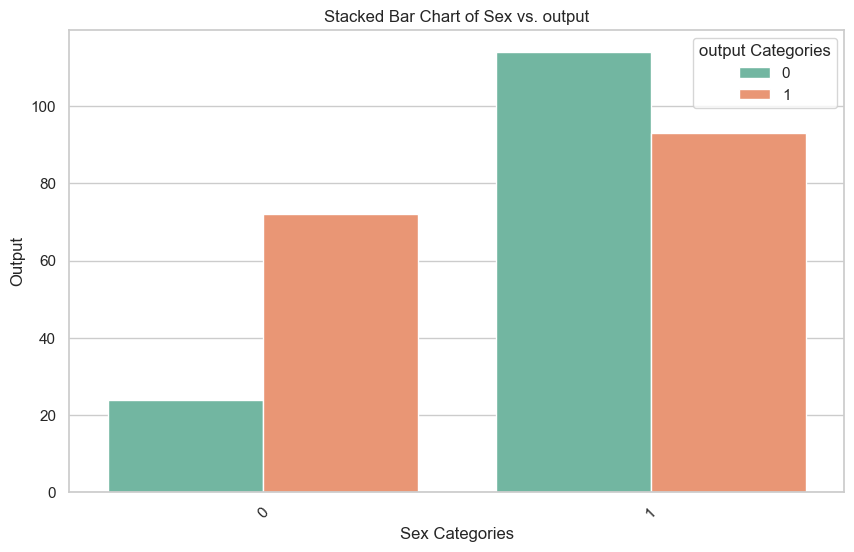

In [13]:

# Create a stacked bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='sex', hue='output', palette='Set2')

plt.xlabel('Sex Categories')
plt.ylabel('Output')
plt.title('Stacked Bar Chart of Sex vs. output')
plt.xticks(rotation=45)

plt.legend(title='output Categories')
plt.show()



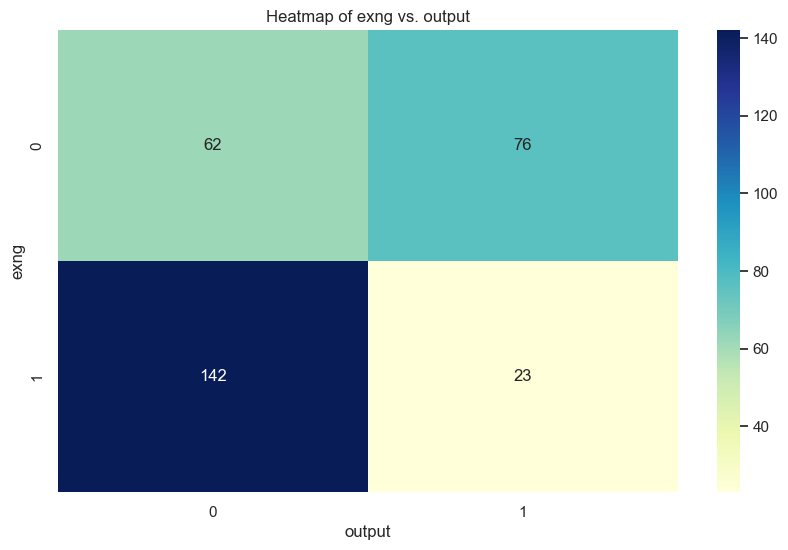

In [14]:
crosstab = pd.crosstab(df['output'], df['exng'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('output')
plt.ylabel('exng')
plt.title('Heatmap of exng vs. output')
plt.show()


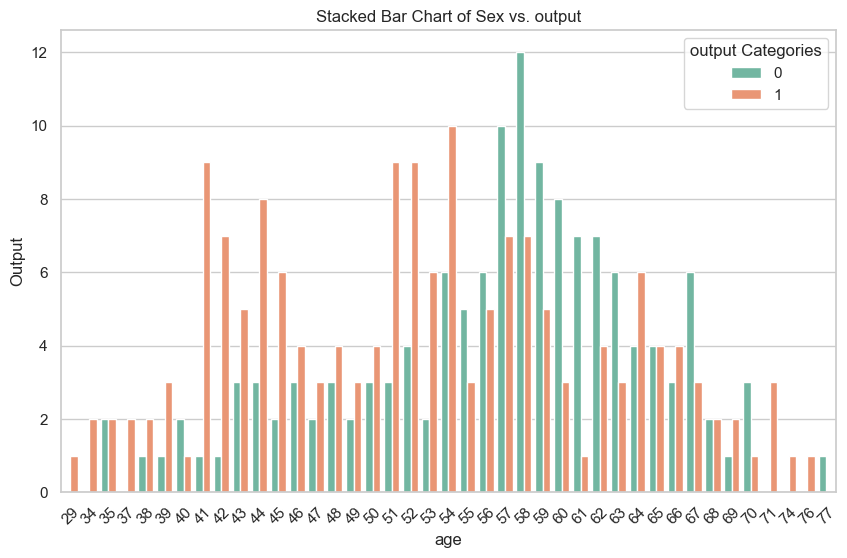

In [15]:
## Age vs output
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='age', hue='output', palette='Set2')

plt.xlabel('age')
plt.ylabel('Output')
plt.title('Stacked Bar Chart of Sex vs. output')
plt.xticks(rotation=45)

plt.legend(title='output Categories')
plt.show()


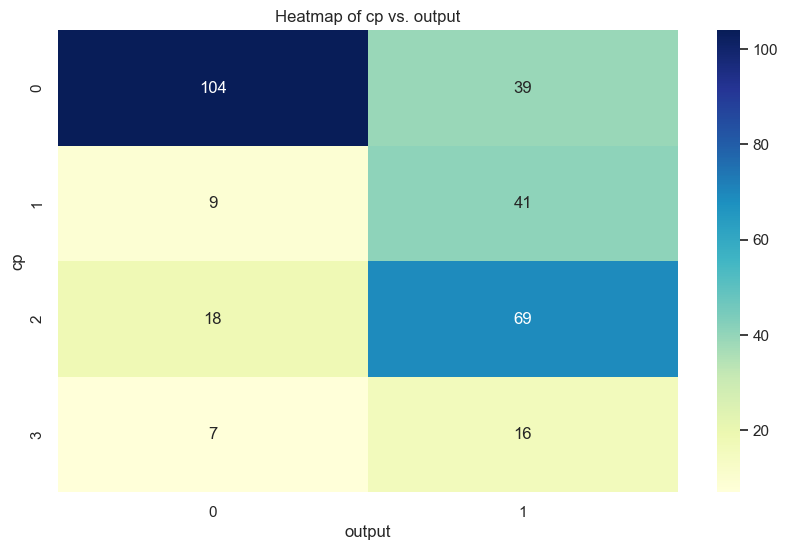

In [16]:
crosstab = pd.crosstab(df['cp'], df['output'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('output')
plt.ylabel('cp')
plt.title('Heatmap of cp vs. output')
plt.show()

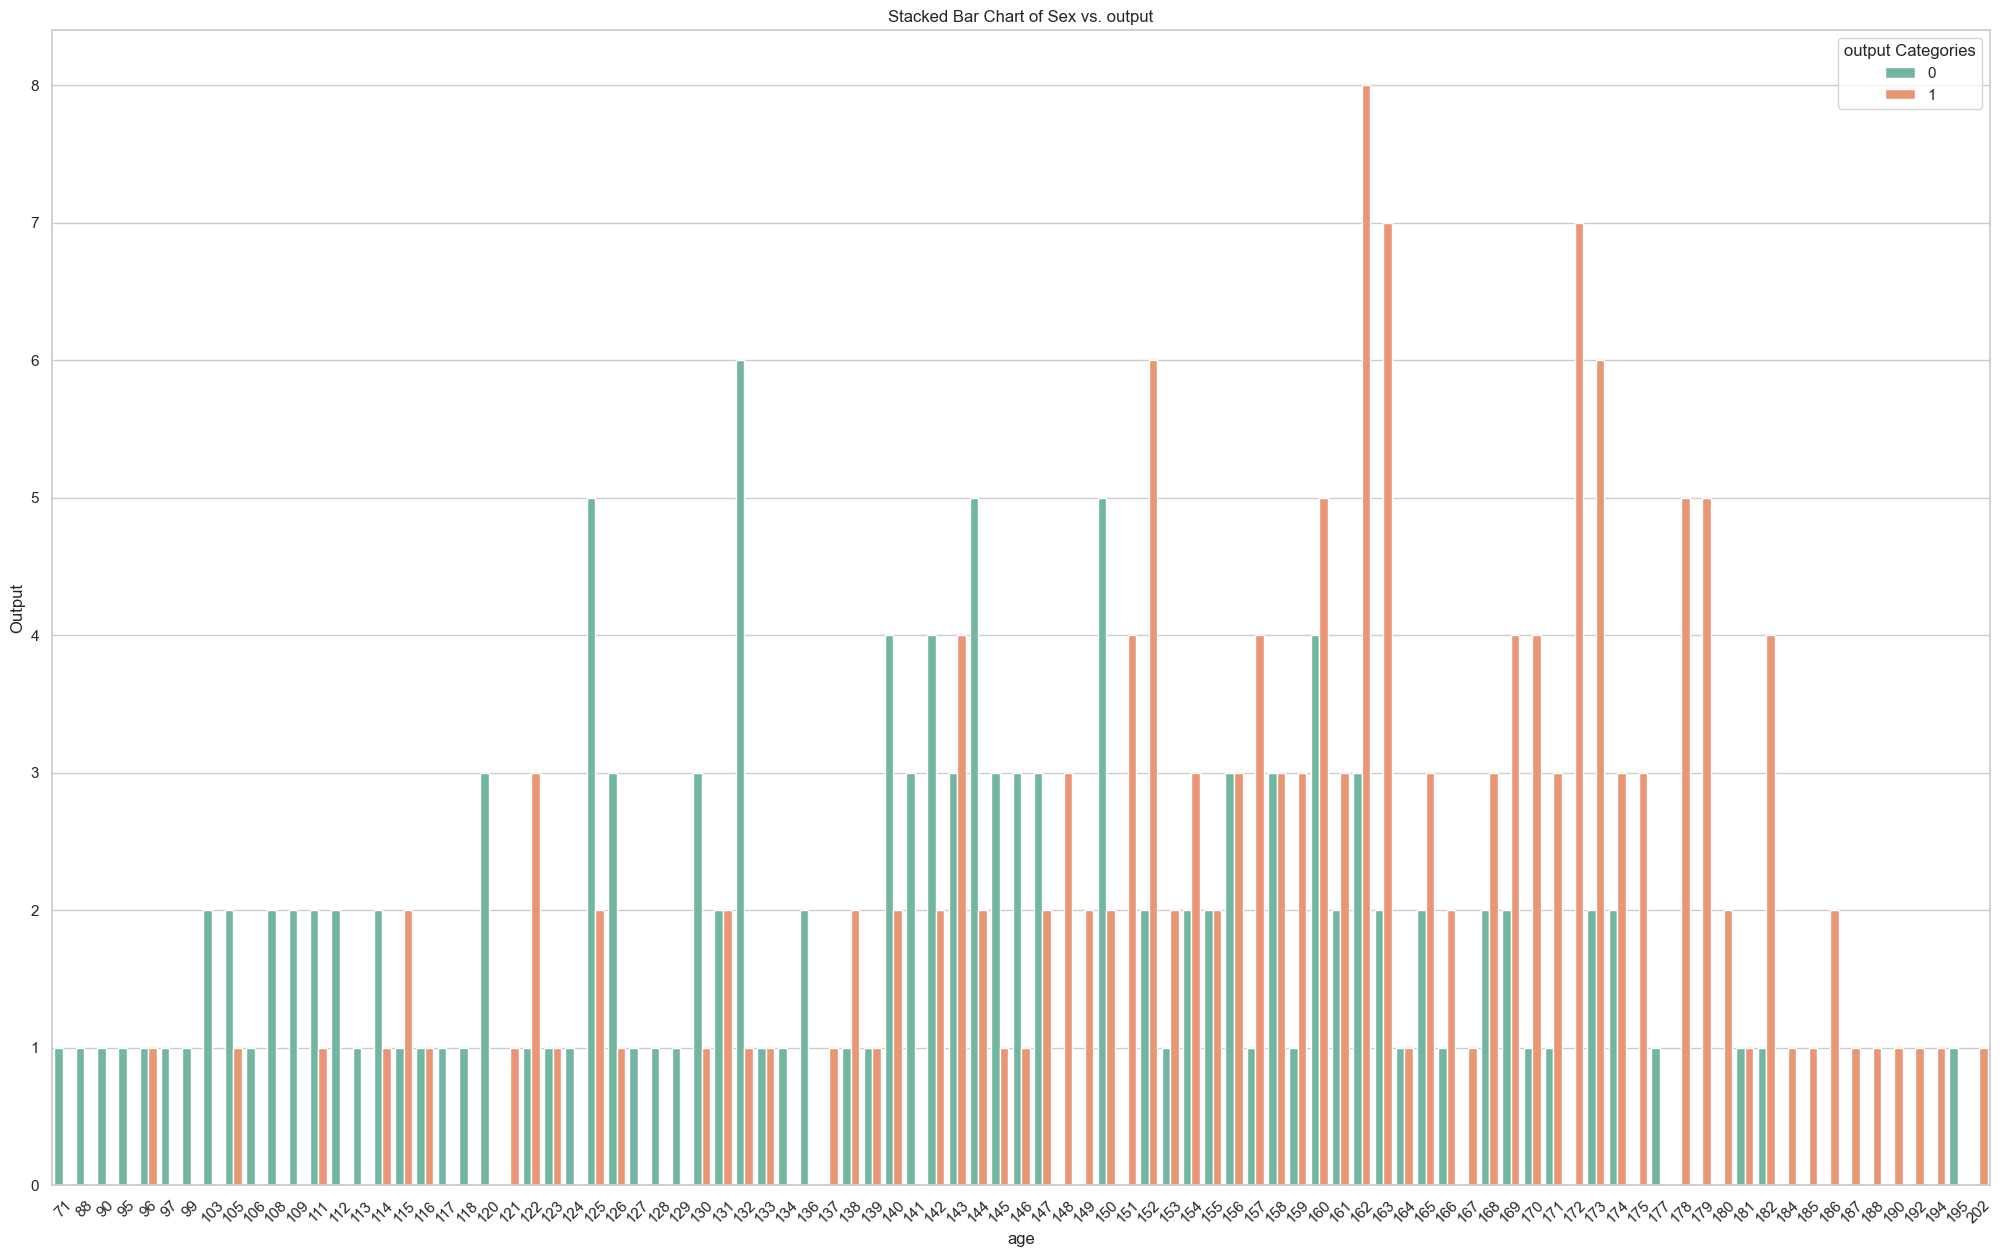

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 15))

sns.countplot(data=df, x='thalachh', hue='output', palette='Set2')

plt.xlabel('age')
plt.ylabel('Output')
plt.title('Stacked Bar Chart of Sex vs. output')
plt.xticks(rotation=45)

plt.legend(title='output Categories')
plt.show()

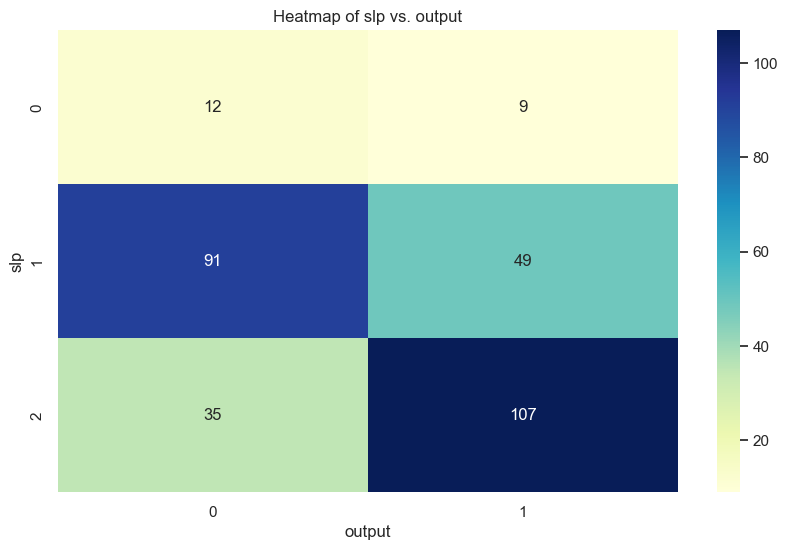

In [18]:
crosstab = pd.crosstab(df['slp'], df['output'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('output')
plt.ylabel('slp')
plt.title('Heatmap of slp vs. output')
plt.show()

## ML models
'''Here we will take different machine learning algorithm and try to find algorithm which predict accurately.

Logistic Regression
Naive Bayes
Random Forest Classifier
Extreme Gradient Boost
K-Nearest Neighbour
Decision Tree
Support Vector Machine'''

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [20]:
prediction=model.predict(X_test)
accuracy=accuracy_score(prediction,Y_test)
print(accuracy)

0.9016393442622951


In [21]:
# !pip install tensorflow

In [22]:
from joblib import dump,load
dump(model,'random')

['random']

In [23]:
r=load("random")

In [24]:
r.predict([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]])

array([1], dtype=int64)